**Disclaimer**

**I hereby declare that this mid-term project is my own original work and has not been submitted before or copied from another source.**

# Business case

**Claim related fraud is a huge problem in the insurance industry. It is quite complex and difficult to identify those unwanted claims. With Machine Learning Algorithm, I am trying to troubleshoot and help the General Insurance industry with this problem.**

**The data that I have is from Automobile Insurance. I will be creating a predictive model that predicts if an insurance claim is fraudulent or not. The answere between YES/NO, is a Binary Classification task.**

**A comparison study has been performed to understand which ML algorithm suits best to the dataset.**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)

Bad key "text.kerning_factor" on line 4 in
C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("insurance_claims.csv")
df.T

0                  1    \
months_as_customer                                328                228   
age                                                48                 42   
policy_number                                  521585             342868   
policy_bind_date                           17-10-2014         27-06-2006   
policy_state                                       OH                 IN   
policy_csl                                    250/500            250/500   
policy_deductable                                1000               2000   
policy_annual_premium                         1406.91            1197.22   
umbrella_limit                                      0            5000000   
insured_zip                                    466132             468176   
insured_sex                                      MALE               MALE   
insured_education_level                            MD                 MD   
insured_occupation                       craft-repair  machine-op-inspct   
insured_hobbies                              sleeping            reading   
insured_relationship                          husband     other-relative   
capital-gains                                   53300                  0   
capital-loss                                        0                  0   
incident_date                              25-01-2015         21-01-2015   
incident_type                Single Vehicle Collision      Vehicle Theft   
collision_type                         Side Collision                  ?   
incident_severity                        Major Damage       Minor Damage   
authorities_contacted                          Police             Police   
incident_state                                     SC                 VA   
incident_city                                Columbus          Riverwood   
incident_location                      9935 4th Drive       6608 MLK Hwy   
incident_hour_of_the_day                            5                  8   
number_of_vehicles_involved                         1                  1   
property_damage                                   YES                  ?   
bodily_injuries                                     1                  0   
witnesses                                           2                  0   
police_report_available                           YES                  ?   
total_claim_amount                              71610               5070   
injury_claim                                     6510                780   
property_claim                                  13020                780   
vehicle_claim                                   52080               3510   
auto_make                                        Saab           Mercedes   
auto_model                                        92x               E400   
auto_year                                        2004               2007   
fraud_reported                                      Y                  Y   

                                                 2    \
months_as_customer                               134   
age                                               29   
policy_number                                 687698   
policy_bind_date                          06-09-2000   
policy_state                                      OH   
policy_csl                                   100/300   
policy_deductable                               2000   
policy_annual_premium                        1413.14   
umbrella_limit                               5000000   
insured_zip                                   430632   
insured_sex                                   FEMALE   
insured_education_level                          PhD   
insured_occupation                             sales   
insured_hobbies                          board-games   
insured_relationship                       own-child   
capital-gains                                  35100   
capital-loss                                       0   
i

In [3]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Text(0.5, 1.0, '% claims')

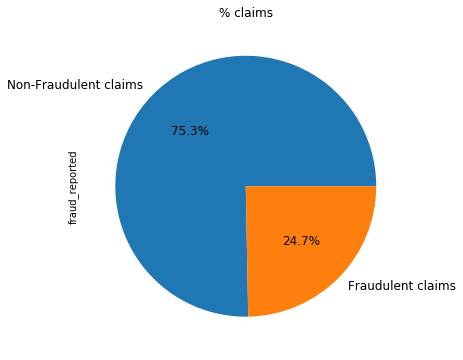

In [4]:
fig = plt.figure(figsize=(10,6))

data = df['fraud_reported'].value_counts()*100.0 /len(df)
ax = (data).plot.pie(autopct='%.1f%%', labels = ['Non-Fraudulent claims', 'Fraudulent claims'], fontsize=12)                                                                           
ax.set_title('% claims')

# Missing values

In [5]:
df = df.replace('?',np.NaN)
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

**collision_type, property_damage and police_report_available have missing values**

**Let's check the most common collision type**

In [6]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

**There are only collision type and amoung all Rear Collision is the most common as collision type can be None**

**Hence we will replace the NaN value with Rear Collision**

In [8]:
df['collision_type'] = df['collision_type'].fillna('Rear Collision')
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

**There might be case were there is no property damange and no police report available hence, we will replace that with NO**

In [10]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [11]:
df['property_damage'] = df['property_damage'].fillna('NO')
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [12]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [13]:
df['police_report_available'] = df['police_report_available'].fillna('NO')
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [14]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [15]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

In [16]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

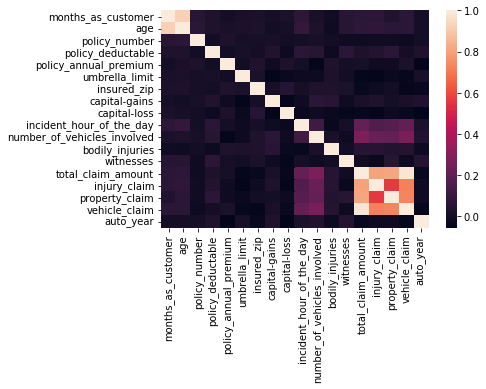

In [17]:
correlation = df.corr()
ax = sns.heatmap(correlation)

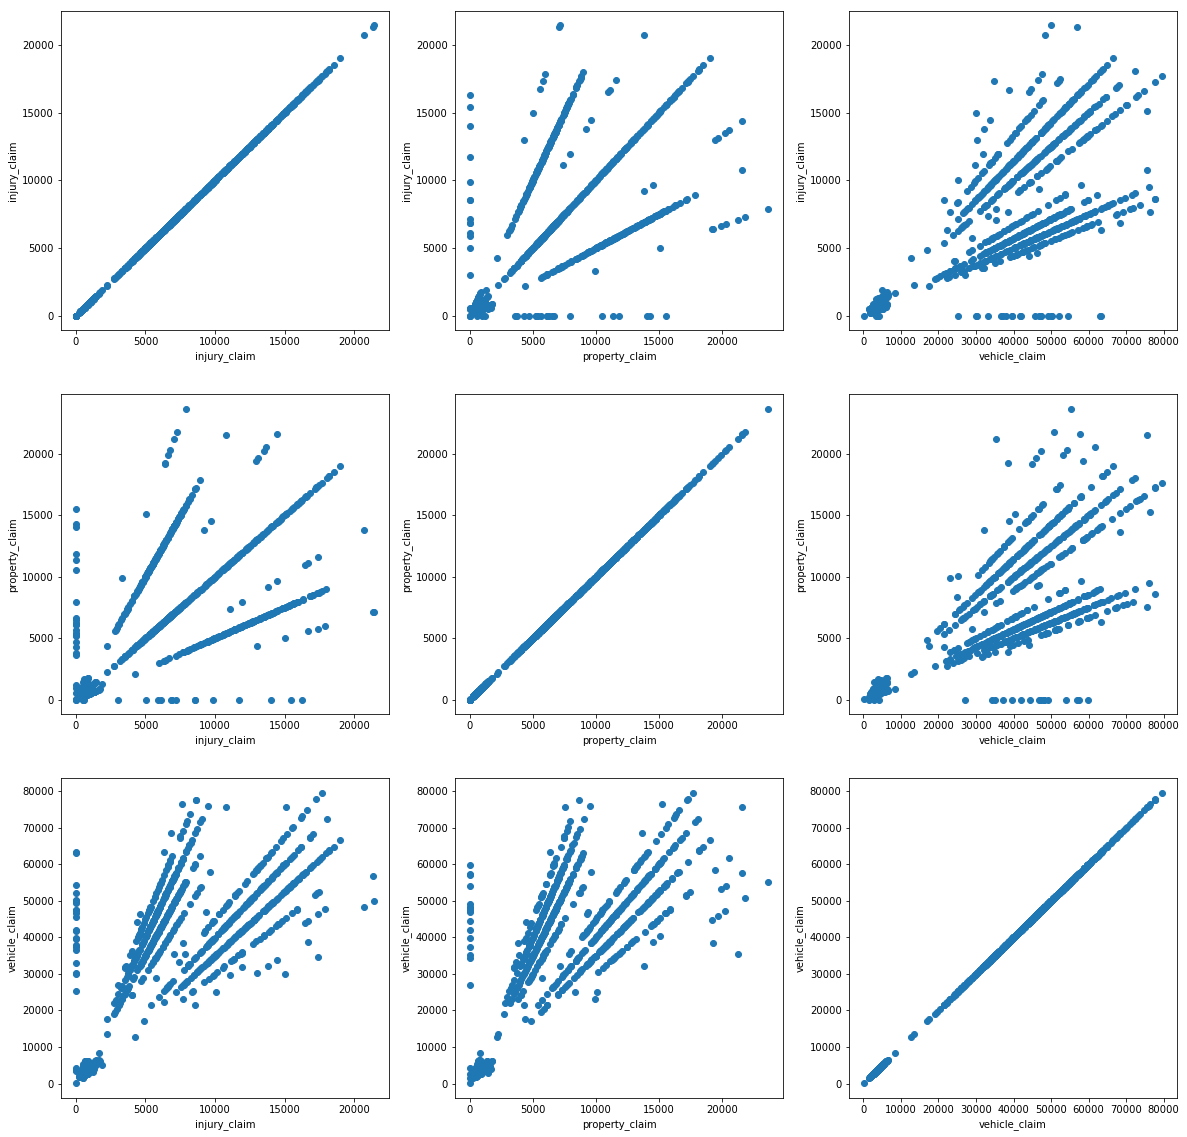

In [19]:
list_ = ["injury_claim", "property_claim", "vehicle_claim"]

fig, axs = plt.subplots(3, 3, figsize=(20,20))

for enumerate_a, a in enumerate(list_):
    for enumerate_b, b in enumerate(list_):
        axs[enumerate_a, enumerate_b].scatter(df[b], df[a])
        axs[enumerate_a, enumerate_b].set_ylabel(a)
        axs[enumerate_a, enumerate_b].set_xlabel(b)

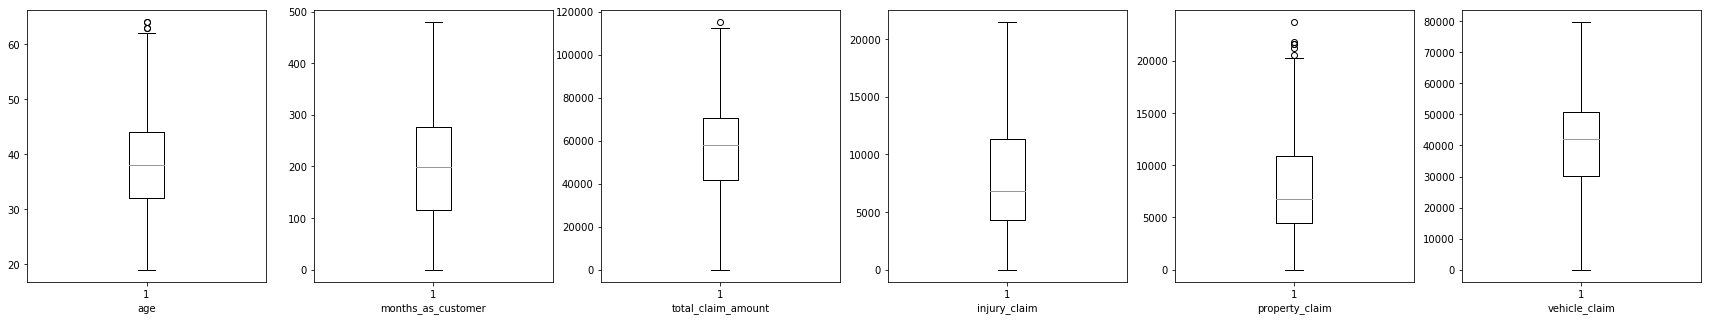

In [20]:
list_ = ["age", "months_as_customer", "total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"]

fig, axs = plt.subplots(1, 6, figsize=(30,5))

for enumerate_a, a in enumerate(list_):
    axs[enumerate_a].boxplot(df[a])
    axs[enumerate_a].set_xlabel(a)

**There are hardly any outliers in the Dataset**

**Changing the target label to binary, Fraud_reported - Yes: 1 and Fraud_reported - No: 0**

In [22]:
df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(1, 0))

## Saving the clean dataset

In [23]:
df.to_csv("CleanedData.csv")

### End of Notebook No.1